In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 分析Suvived和其他欄位的關係

#### Pclass vs Survived

In [4]:
train[['Pclass','Survived']].groupby('Pclass').mean()
#可以看出等級越高的船艙生存率越高

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


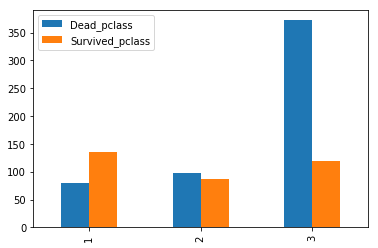

In [5]:
Survived_pclass = train[train['Survived'] == 1]['Pclass'].value_counts()
Dead_pclass = train[train['Survived'] == 0]['Pclass'].value_counts()
df = pd.DataFrame([Dead_pclass,Survived_pclass],index=['Dead_pclass','Survived_pclass'])
df.T.plot(kind='bar')

#### SibSp, Parch vs Survived

In [6]:
train[['SibSp','Survived']].groupby('SibSp').mean()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [7]:
train[['Parch','Survived']].groupby('Parch').mean()

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


In [8]:
df_test = pd.DataFrame()
df_test = train[['SibSp','Parch','Survived']]
df_test['family'] = train['SibSp']+train['Parch']
df_test[['family','Survived']].groupby('family').mean()
#將SibSp和Parch合併成一個欄位

/Users/fafa/anaconda3/envs/python-crawler/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,Survived
family,
0,0.303538
1,0.552795
2,0.578431
3,0.724138
4,0.200000
5,0.136364
6,0.333333
7,0.000000
10,0.000000


In [9]:
df_test['family'].value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: family, dtype: int64

#### Age vs Survived

In [10]:
#train[['Age','Survived']].groupby('Age').mean()
Dead_age = train[train['Survived'] == 0]['Age']
Survived_age = train[train['Survived'] == 1]['Age']
df = pd.DataFrame([Dead_age,Survived_age],index=['Dead_age','Survived_age'])

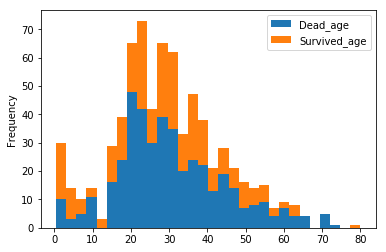

In [11]:
df.T.plot(kind='hist',stacked=True,bins=30)

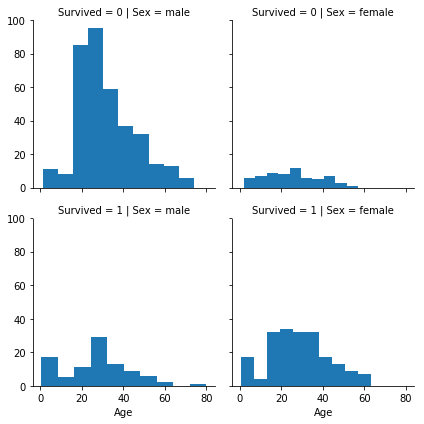

In [12]:
g = sns.FacetGrid(train, col="Sex", row='Survived')
g = g.map(plt.hist, "Age")

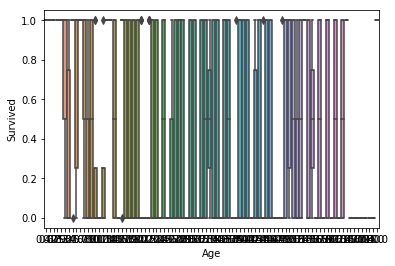

In [13]:
sns.boxplot(x='Age',y='Survived',data=train)

#### Sex vs Survived

In [14]:
train[['Sex','Survived']].groupby('Sex').mean()
##女性較男性生存率高

,Survived
Sex,
female,0.742038
male,0.188908


#### Cabin vs Survived

In [15]:
df = train[['Cabin','Survived']]
df['Cabin'] = df['Cabin'].str.extract('([A-Z])')
df[['Cabin','Survived']].groupby('Cabin').mean()

/Users/fafa/anaconda3/envs/python-crawler/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  from ipykernel import kernelapp as app
/Users/fafa/anaconda3/envs/python-crawler/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,Survived
Cabin,
A,0.466667
B,0.744681
C,0.593220
D,0.757576
E,0.750000
F,0.615385
G,0.500000
T,0.000000


#### Embarked vs Survived

In [16]:
df = train[['Embarked','Survived']]
df.groupby('Embarked').mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


In [17]:
train[['Embarked','Pclass','Survived']].groupby('Embarked').count()

,Pclass,Survived
Embarked,,
C,168,168
Q,77,77
S,644,644


In [18]:
pd.pivot_table(train[['Embarked','Pclass','Survived']],index=['Embarked','Pclass'],aggfunc='count')
#大部分的人都是由S搭乘

Survived
Embarked Pclass          
C        1             85
         2             17
         3             66
Q        1              2
         2              3
         3             72
S        1            127
         2            164
         3            353

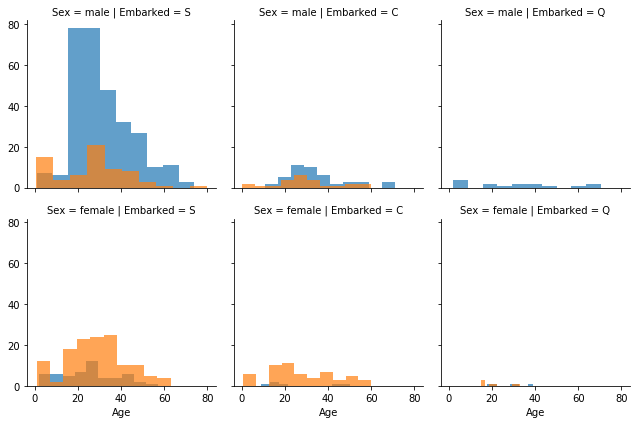

In [19]:
g = sns.FacetGrid(train, col='Embarked' ,row='Sex', hue='Survived')
g.map(plt.hist, 'Age', alpha=0.7)

/Users/fafa/anaconda3/envs/python-crawler/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/fafa/anaconda3/envs/python-crawler/lib/python3.6/site-packages/seaborn/axisgrid.py:708: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


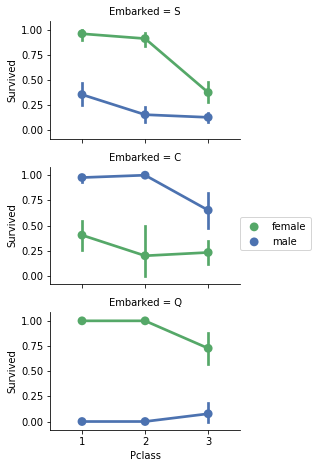

In [20]:
grid = sns.FacetGrid(train, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

In [21]:
train[['Pclass','Fare']].groupby(by='Pclass').mean()

,Fare
Pclass,
1,84.154687
2,20.662183
3,13.675550


In [22]:
train[['Embarked','Fare']].groupby(by='Embarked').mean()

,Fare
Embarked,
C,59.954144
Q,13.276030
S,27.079812


#### Name vs Survived

In [23]:
df = train[['Name','Survived']]
df['Name']=df['Name'].str.split(',',expand=True)[1]
df['Name']=df['Name'].str.split('.',expand=True)[0]
df

/Users/fafa/anaconda3/envs/python-crawler/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/fafa/anaconda3/envs/python-crawler/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,Name,Survived
0,Mr,0
1,Mrs,1
2,Miss,1
3,Mrs,1
4,Mr,0
5,Mr,0
6,Mr,0
7,Master,0
8,Mrs,1
9,Mrs,1


In [24]:
df.groupby('Name').mean()

,Survived
Name,
Capt,0.000000
Col,0.500000
Don,0.000000
Dr,0.428571
Jonkheer,0.000000
Lady,1.000000
Major,0.500000
Master,0.575000
Miss,0.697802


## 處理缺失值

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [26]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [27]:
y = train['Survived']

In [28]:
#將train(891筆)和test(418筆)合併一起處理缺失值
X = train.append(test)
#Cabin缺失太多，刪除此feature
X.drop('Cabin',axis=1,inplace=True)

In [29]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
Age            1046 non-null float64
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(4)
memory usage: 122.7+ KB


#### Name : 縮減名稱

In [30]:
X['Name'] = X['Name'].str.split(', ',expand=True)[1].str.split('.',expand=True)[0]
X.head()

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,S,7.2500,Mr,0,1,3,male,1,0.0,A/5 21171
1,38.0,C,71.2833,Mrs,0,2,1,female,1,1.0,PC 17599
2,26.0,S,7.9250,Miss,0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,S,53.1000,Mrs,0,4,1,female,1,1.0,113803
4,35.0,S,8.0500,Mr,0,5,3,male,0,0.0,373450


#### Fare

In [31]:
#Fare有一筆為空，觀察此筆資料
X[X['Fare'].isna()]

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
152,60.5,S,NaN,Mr,0,1044,3,male,0,NaN,3701


In [32]:
#找出Pclass、Name、Age和他相近的人，以這些人的平均Fare填補
fill_fare = X[(X['Pclass'] == 3) & (X['Name'] == 'Mr') & (X['Age'] > 50) & (X['Age'] < 70) ]['Fare'].mean()
X.loc[X['Fare'].isna(),'Fare'] = fill_fare

#### Embarked

In [33]:
#Embarked有兩筆為空，觀察此筆資料
X[X['Embarked'].isna()]

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
61,38.0,NaN,80.0,Miss,0,62,1,female,0,1.0,113572
829,62.0,NaN,80.0,Mrs,0,830,1,female,0,1.0,113572


In [34]:
df=train[['Embarked','Pclass','Survived']]
df=df[df['Survived'] == 1]
pd.pivot_table(df,index=['Embarked'],columns='Pclass',aggfunc='count')
#可以發現船艙為1生存率最高的上岸港口為S

Survived        
Pclass          1   2   3
Embarked                 
C              59   9  25
Q               1   2  27
S              74  76  67

In [35]:
X['Embarked'].fillna('S',inplace=True)

#### Age

In [36]:
X[X['Age'].isna()].head()

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
5,NaN,Q,8.4583,Mr,0,6,3,male,0,0.0,330877
17,NaN,S,13.0000,Mr,0,18,2,male,0,1.0,244373
19,NaN,C,7.2250,Mrs,0,20,3,female,0,1.0,2649
26,NaN,C,7.2250,Mr,0,27,3,male,0,0.0,2631
28,NaN,Q,7.8792,Miss,0,29,3,female,0,1.0,330959


In [37]:
X[['Name','Age']].groupby('Name').agg({'Age':['count','mean']})

Age           
             count       mean
Name                         
Capt             1  70.000000
Col              4  54.000000
Don              1  40.000000
Dona             1  39.000000
Dr               7  43.571429
Jonkheer         1  38.000000
Lady             1  48.000000
Major            2  48.500000
Master          53   5.482642
Miss           210  21.774238
Mlle             2  24.000000
Mme              1  24.000000
Mr             581  32.252151
Mrs            170  36.994118
Ms               1  28.000000
Rev              8  41.250000
Sir              1  49.000000
the Countess     1  33.000000

In [38]:
X['Name'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [39]:
title = ['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
             'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
             'Jonkheer', 'Dona']
df= pd.DataFrame(columns=title,index=['cnt','age_mean','age_median','cnt_survived','cnt_dead','survived_rate','na'])
for name in title:
    df[name].cnt = X[X['Name'] == name]['Name'].count()
    df[name].age_mean = X[X['Name'] == name]['Age'].mean()
    df[name].age_median = X[X['Name'] == name]['Age'].median()
    df[name].cnt_survived = X[(X['Name'] == name) & (X['Survived'] == 1)]['Name'].count()
    df[name].cnt_dead = X[(X['Name'] == name) & (X['Survived'] == 0)]['Name'].count()
    df[name].survived_rate = df[name].cnt_survived / (df[name].cnt_survived + df[name].cnt_dead)
    df[name].na = X[(X['Name'] == name) & (X['Age'].isna())]['Age'].size 
df
#觀察各Title年齡和存活的關係

/Users/fafa/anaconda3/envs/python-crawler/lib/python3.6/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in long_scalars


,Mr,Mrs,Miss,Master,Don,Rev,Dr,Mme,Ms,Major,Lady,Sir,Mlle,Col,Capt,the Countess,Jonkheer,Dona
cnt,757,197,260,61,1,8,8,1,2,2,1,1,2,4,1,1,1,1
age_mean,32.2522,36.9941,21.7742,5.48264,40,41.25,43.5714,24,28,48.5,48,49,24,54,70,33,38,39
age_median,29,35.5,22,4,40,41.5,49,24,28,48.5,48,49,24,54.5,70,33,38,39
cnt_survived,81,99,127,23,0,0,3,1,1,1,1,1,2,1,0,1,0,0
cnt_dead,436,26,55,17,1,6,4,0,0,1,0,0,0,1,1,0,1,0
survived_rate,0.156673,0.792,0.697802,0.575,0,0,0.428571,1,1,0.5,1,1,1,0.5,0,1,0,NaN
na,176,27,50,8,0,0,1,0,1,0,0,0,0,0,0,0,0,0


In [47]:
#將Age缺失的資料用其Title群組的中位數補上
title_nan = X[X['Age'].isna()]['Name'].unique()
for title in title_nan:
    X.loc[(X['Name'] == title) & (X['Age'].isna()),'Age'] = df[title].age_median

In [48]:
X.info()
#所有資料的補齊了

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
Age            1309 non-null float64
Embarked       1309 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(4)
memory usage: 162.7+ KB


In [49]:
#有些Title只有個位數人數，會變成噪音，將他們會成其他較常見的Title:[Mr,Mrs,Miss,Master,Rev,Dr]
X[~X['Name'].isin(['Mr','Mrs','Miss','Master','Rev','Dr'])].sort_values('Name')
#有些Title只有個位數人數，會變成噪音，將他們會成其他較常見的Title:[Mr,Mrs,Miss,Master]
# X[~X['Name'].isin(['Mr','Mrs','Miss','Master'])].sort_values('Name')

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
745,70.0,S,71.0000,Capt,1,746,1,male,1,0.0,WE/P 5735
647,56.0,C,35.5000,Col,0,648,1,male,0,1.0,13213
131,53.0,C,28.5000,Col,0,1023,1,male,0,NaN,113780
694,60.0,S,26.5500,Col,0,695,1,male,0,0.0,113800
202,47.0,C,227.5250,Col,0,1094,1,male,1,NaN,PC 17757
30,40.0,C,27.7208,Don,0,31,1,male,0,0.0,PC 17601
414,39.0,C,108.9000,Dona,0,1306,1,female,0,NaN,PC 17758
822,38.0,S,0.0000,Jonkheer,0,823,1,male,0,0.0,19972
556,48.0,C,39.6000,Lady,0,557,1,female,1,1.0,11755
536,45.0,S,26.5500,Major,0,537,1,male,0,0.0,113050


In [50]:
#因為女性的生存率普遍較高所以主要分到Mrs和Miss就可以了：30歲以上分到Mrs, 30歲以下女性分到Miss
#Master為小孩
X.loc[X['Name'].isin(['Dona','Lady','the Countess']),'Name'] = 'Mrs'  #分到Mrs
X.loc[X['Name'].isin(['Mlle','Mme','Ms']),'Name'] = 'Miss'  #分到Miss

In [52]:
X[~X['Name'].isin(['Mr','Mrs','Miss','Master','Rev','Dr'])].sort_values('Name')

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
745,70.0,S,71.0000,Capt,1,746,1,male,1,0.0,WE/P 5735
647,56.0,C,35.5000,Col,0,648,1,male,0,1.0,13213
694,60.0,S,26.5500,Col,0,695,1,male,0,0.0,113800
131,53.0,C,28.5000,Col,0,1023,1,male,0,NaN,113780
202,47.0,C,227.5250,Col,0,1094,1,male,1,NaN,PC 17757
30,40.0,C,27.7208,Don,0,31,1,male,0,0.0,PC 17601
822,38.0,S,0.0000,Jonkheer,0,823,1,male,0,0.0,19972
449,52.0,S,30.5000,Major,0,450,1,male,0,1.0,113786
536,45.0,S,26.5500,Major,0,537,1,male,0,0.0,113050
599,49.0,C,56.9292,Sir,0,600,1,male,1,1.0,PC 17485


In [53]:
#男性的稱謂會影響生存率：Rev為Pclass=2、embarked=S的男性，Dr主要為Pclass=1的男性，但因為他們都是Pclass=1所以生存率也會偏大
#全分到Dr
X.loc[~X['Name'].isin(['Mr','Mrs','Miss','Master','Rev','Dr']),'Name'] = 'Dr'
# X.loc[~X['Name'].isin(['Mr','Mrs','Miss','Master']),'Name'] = 'Mr'

In [54]:
#將SibSp和Parch合併成一個欄位：
X['Family'] = X['SibSp'] + X['Parch']

In [55]:
#決定Features
X = X[['Age','Embarked','Fare','Name','Pclass','Sex','Family']]

In [56]:
X.head()

,Age,Embarked,Fare,Name,Pclass,Sex,Family
0,22.0,S,7.2500,Mr,3,male,1
1,38.0,C,71.2833,Mrs,1,female,1
2,26.0,S,7.9250,Miss,3,female,0
3,35.0,S,53.1000,Mrs,1,female,1
4,35.0,S,8.0500,Mr,3,male,0


### 處理分類類別

In [57]:
X = pd.get_dummies(X,prefix_sep='_',drop_first=True)
X.head()

,Age,Fare,Pclass,Family,Embarked_Q,Embarked_S,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Name_Rev,Sex_male
0,22.0,7.2500,3,1,0,1,0,0,1,0,0,1
1,38.0,71.2833,1,1,0,0,0,0,0,1,0,0
2,26.0,7.9250,3,0,0,1,0,1,0,0,0,0
3,35.0,53.1000,1,1,0,1,0,0,0,1,0,0
4,35.0,8.0500,3,0,0,1,0,0,1,0,0,1


In [58]:
#將train和test分開
X_pred = X[891:]
X = X[:891]

### Train/Test Split

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [60]:
X_train.head()

,Age,Fare,Pclass,Family,Embarked_Q,Embarked_S,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Name_Rev,Sex_male
35,42.0,52.0000,1,1,0,1,0,0,1,0,0,1
46,29.0,15.5000,3,1,1,0,0,0,1,0,0,1
453,49.0,89.1042,1,1,0,0,0,0,1,0,0,1
291,19.0,91.0792,1,1,0,0,0,0,0,1,0,0
748,19.0,53.1000,1,1,0,1,0,0,1,0,0,1


### 特徵縮放

In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [64]:
X_train_scale

array([[ 0.92115318,  0.44426438, -1.59326334, ..., -0.41216187,
        -0.08684168,  0.73186897],
       [-0.04587013, -0.34951364,  0.81738199, ..., -0.41216187,
        -0.08684168,  0.73186897],
       [ 1.44185805,  1.25118215, -1.59326334, ..., -0.41216187,
        -0.08684168,  0.73186897],
       ..., 
       [-0.64096141,  0.91183226, -0.38794068, ..., -0.41216187,
        -0.08684168,  0.73186897],
       [-0.566575  , -0.52240502,  0.81738199, ..., -0.41216187,
        -0.08684168, -1.36636481],
       [-0.64096141, -0.51153134,  0.81738199, ..., -0.41216187,
        -0.08684168,  0.73186897]])

### 訓練模型

#### SVM

In [65]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

svc_classifier = SVC(kernel='poly').fit(X_train_scale, y_train)
y_pred = svc_classifier.predict(X_test_scale)
print(confusion_matrix(y_test, y_pred))
print('train accuracy: ', svc_classifier.score(X_train_scale, y_train))
print('test accuracy: ', svc_classifier.score(X_test_scale, y_test))

##accuracy(y_test, y_pred) = svc_classifier.score(X_test, y_test)

[[119   9]
 [ 35  60]]
train accuracy:  0.85628742515
test accuracy:  0.80269058296


In [66]:
from sklearn.cross_validation import cross_val_score,cross_val_predict
svc_classifier = SVC(kernel='poly').fit(X_train_scale, y_train)
score = cross_val_score(svc_classifier, X_train_scale, y_train)
score.mean()

/Users/fafa/anaconda3/envs/python-crawler/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


0.83545152295152292

In [67]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

svc_classifier = SVC(kernel='rbf').fit(X_train_scale, y_train)
y_pred = svc_classifier.predict(X_test_scale)
print(confusion_matrix(y_test, y_pred))
print('train accuracy: ', svc_classifier.score(X_train_scale, y_train))
print('test accuracy: ', svc_classifier.score(X_test_scale, y_test))

[[120   8]
 [ 36  59]]
train accuracy:  0.85628742515
test accuracy:  0.80269058296


In [68]:
from sklearn.cross_validation import cross_val_score,cross_val_predict
svc_classifier = SVC(kernel='rbf').fit(X_train_scale, y_train)
score = cross_val_score(svc_classifier, X_train_scale, y_train)
score.mean()

0.84291881166881177

In [ ]:
# from sklearn.model_selection import GridSearchCV
# svc_classifier = SVC()
# grid_values = {'degree':[1,3,5,7],'C':[0.01,0.1,1,10],'kernel':['rbf','poly']}
# gs_classaifier = GridSearchCV(svc_classifier,param_grid=grid_values, scoring='accuracy').fit(X_train, y_train)

In [ ]:
# print("SVC best params: ".format(gs_classaifier.best_params_))
# print("SVC best score: ".format(gs_classifier.best_score_))

#### Logistic Regression

In [69]:
from sklearn.cross_validation import cross_val_score,cross_val_predict
from sklearn.linear_model import LogisticRegression
log_classifier = LogisticRegression().fit(X_train_scale, y_train)
y_pred = log_classifier.predict(X_test_scale)
print(confusion_matrix(y_test, y_pred))
print('train accuracy: ', log_classifier.score(X_train_scale, y_train))
print('test accuracy: ', log_classifier.score(X_test_scale, y_test))

[[114  14]
 [ 29  66]]
train accuracy:  0.835329341317
test accuracy:  0.807174887892


In [70]:
log_classifier = LogisticRegression().fit(X_train_scale, y_train)
score = cross_val_score(log_classifier, X_train_scale, y_train)
score.mean()

0.82791720291720294

#### GradientBoosting Classifier

In [72]:
from sklearn.ensemble import GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier().fit(X_train, y_train)
y_pred = gb_classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print('train accuracy: ', gb_classifier.score(X_train, y_train))
print('test accuracy: ', gb_classifier.score(X_test, y_test))

[[118  10]
 [ 34  61]]
train accuracy:  0.916167664671
test accuracy:  0.80269058296


In [73]:
gb_classifier = GradientBoostingClassifier().fit(X_train, y_train)
score = cross_val_score(gb_classifier, X_train, y_train)
score.mean()

0.83392320892320893

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier().fit(X_train, y_train)
grid_values = {'learning_rate':[0.01,0.1,1,10], 'max_depth':[3,5,7,9]}
gs_classifier = GridSearchCV(gb_classifier, param_grid=grid_values, scoring='accuracy').fit(X_train, y_train)

In [ ]:
gs_classifier.best_params_

In [ ]:
gs_classifier.best_score_

In [ ]:
gb_classifier = GradientBoostingClassifier().fit(X_train, y_train)
grid_values = {'learning_rate':[0.08,0.09,0.1,0.12,0.13], 'max_depth':[4,5,6,7]}
gs_classifier = GridSearchCV(gb_classifier, param_grid=grid_values, scoring='accuracy').fit(X_train, y_train)

In [ ]:
gs_classifier.best_score_

In [ ]:
gs_classifier.best_params_

#### RandomForest

In [74]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier().fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)


print(confusion_matrix(y_test, y_pred))
print('train accuracy: ', rf_classifier.score(X_train, y_train))
print('test accuracy: ', rf_classifier.score(X_test, y_test))

[[114  14]
 [ 39  56]]
train accuracy:  0.965568862275
test accuracy:  0.762331838565


In [75]:
score = cross_val_score(rf_classifier, X_train, y_train)
score.mean()

0.81296921921921916

#### MLPClassifier

In [76]:
from sklearn.neural_network import MLPClassifier
mlp_classifier = MLPClassifier(hidden_layer_sizes = [10,10], solver='lbfgs', random_state = 0).fit(X_train, y_train)
y_pred = mlp_classifier.predict(X_test_scale)

print(confusion_matrix(y_test, y_pred))
print('train accuracy: ', mlp_classifier.score(X_test_scale, y_test))
print('test accuracy: ', accuracy_score(y_pred, y_test))

[[57 71]
 [15 80]]
train accuracy:  0.614349775785
test accuracy:  0.614349775785


In [77]:
score = cross_val_score(mlp_classifier, X_train_scale, y_train)
score.mean()

0.79948251823251837

#### Naive Bays

In [79]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB().fit(X_train, y_train)
y_pred = nb_classifier.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print('train accuracy: ', nb_classifier.score(X_train, y_train))
print('test accuracy: ', nb_classifier.score(X_test, y_test))

[[96 32]
 [24 71]]
train accuracy:  0.782934131737
test accuracy:  0.748878923767


#### KNN

In [80]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier().fit(X_train_scale, y_train)
y_pred = knn_classifier.predict(X_test_scale)

print(confusion_matrix(y_test, y_pred))
print('train accuracy: ', knn_classifier.score(X_train_scale, y_train))
print('test accuracy: ', knn_classifier.score(X_test_scale, y_test))

[[111  17]
 [ 35  60]]
train accuracy:  0.866766467066
test accuracy:  0.766816143498


In [81]:
score = cross_val_score(knn_classifier, X_train_scale, y_train)
score.mean()

0.8293784856284856

### SVM 分數最高

In [82]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
svm_classifier = SVC()
grid_values = {'C':[0.01,0.1,1], 'degree':[3,7,10],'kernel' :['rbf']}
gs_classifier = GridSearchCV(svm_classifier, param_grid=grid_values).fit(X_train_scale, y_train)

In [83]:
print(gs_classifier.best_params_)
print(gs_classifier.best_score_)

{'C': 1, 'degree': 3, 'kernel': 'rbf'}
0.842814371257


In [84]:
svm_classifier = SVC()
grid_values = {'C':[1,5,10], 'degree':[1,3],'kernel' :['rbf']}
gs_classifier = GridSearchCV(svm_classifier,param_grid=grid_values).fit(X_train_scale, y_train)

In [85]:
print(gs_classifier.best_params_)
print(gs_classifier.best_score_)

{'C': 1, 'degree': 1, 'kernel': 'rbf'}
0.842814371257


In [87]:
svm_classifier = SVC(C=1, kernel='rbf', degree=1).fit(X_train_scale, y_train)

In [88]:
from sklearn.metrics import accuracy_score
y_pred = svm_classifier.predict(X_test_scale)
accuracy_score(y_test, y_pred)

0.80269058295964124

In [89]:
X_pred_scale = scaler.transform(X_pred)
X_pred_scale

array([[ 0.36325512, -0.51633316,  0.81738199, ..., -0.41216187,
        -0.08684168,  0.73186897],
       [ 1.29308523, -0.53436605,  0.81738199, ...,  2.42623122,
        -0.08684168, -1.36636481],
       [ 2.40888137, -0.47592007, -0.38794068, ..., -0.41216187,
        -0.08684168,  0.73186897],
       ..., 
       [ 0.66080075, -0.52892922,  0.81738199, ..., -0.41216187,
        -0.08684168,  0.73186897],
       [-0.04587013, -0.51153134,  0.81738199, ..., -0.41216187,
        -0.08684168,  0.73186897],
       [-1.90553036, -0.20036384,  0.81738199, ..., -0.41216187,
        -0.08684168,  0.73186897]])

In [90]:
y_pred_submission = svm_classifier.predict(X_pred_scale)

In [91]:
submission = pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':y_pred_submission})

In [92]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [93]:
submission.to_csv('titanic-submission.csv', index=False)